In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#Para la red convolucional
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#importamos el dataset MNIST de keras.
from tensorflow.keras.datasets import mnist

#sklern, pqra enmascarar las variables categòricas.
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1) PREPROCESAMIENTO DE LOS DATOS.
#--------------------------------------------------------------------------------

#Lectura del set de datos: MNIST.
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Estas imagenes de escritura de números a mano alzada tienen un tamaño de 28 x 28. 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#Normalización de los datos. 255 es el numero mayor de las columnas.
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# Finalmente, convertimos y_train y y_test a representación "one-hot"
nclasses= 10
y_train = to_categorical(y_train,nclasses)
y_test =  to_categorical(y_test,nclasses)

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


(-0.5, 27.5, 27.5, -0.5)

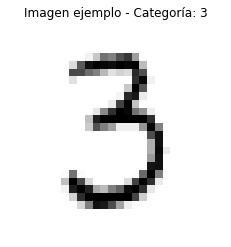

In [6]:
#Visualización de un ejemplo
imagen = 50
plt.imshow(x_train[imagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[imagen])))
plt.axis('off')

In [7]:
# Por estar compuesto el set de datos de imagenes, se requiere configurar la partición 
# de este en el formato requerido para la dimensión de una imagen, por eso,
# 28,28 y,1 que representan el numero de número de filas, nùmero de comlumnas y, número de canales. 

#En este caso, el número de canales es 1, porque las imagenes estan en escalas de grises.
#Para imagenes de color es 3, representando a los colores Red (rojo), Green (verde) y, Blue (azul). 

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# 2) Creación del Modelo.
#--------------------------------------------------------------------------------


''' Modelo a Implementar

Capa                Características

CONV 1              6 filtros, 5x5, p=0, s=1, activación: ReLU
MAX-POOLING 1       6 filtros, 2x2, p=0, s=2, activación: Ninguna
CONV 2              16 filtros, 5x5, p=0, s=1, activación: ReLU
MAX-POOLING 2       16 filtros, 2x2, p=0, s=2, activación: Ninguna
FLATTEN             Simplemente convierte un volumen en un vector

FULLY CONNECTED 1   120 neuronas, activación: ReLU
FULLY CONNECTED 2   84 neuronas, activación: ReLU

SALIDA              10 categorías, activación: softmax

'''

' Modelo a Implementar\n\nCapa                Características\n\nCONV 1              6 filtros, 5x5, p=0, s=1, activación: ReLU\nMAX-POOLING 1       6 filtros, 2x2, p=0, s=2, activación: Ninguna\nCONV 2              16 filtros, 5x5, p=0, s=1, activación: ReLU\nMAX-POOLING 2       16 filtros, 2x2, p=0, s=2, activación: Ninguna\nFLATTEN             Simplemente convierte un volumen en un vector\n\nFULLY CONNECTED 1   120 neuronas, activación: ReLU\nFULLY CONNECTED 2   84 neuronas, activación: ReLU\n\nSALIDA              10 categorías, activación: softmax\n\n'

In [12]:
#Creamos Sequential, para configurar las dimensiones de la red neuronal.

modelo = Sequential()

#Añadimos las dos capas de la red neuronal con sus filtros, el tamaño del kernel(filtro) y 
#la función de activación.

#Conv2D para las capas convolucionales.
#MaxPooling2D para el max-pooling.

# Capa 1: CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Capa 2: CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Aplanado con la función Flatten por ser una imagen y, definimos el número de neuronas
# para cada capa: Capa 1 (120), Capa 2 (84) y salida (10).

modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclasses,activation='softmax'))

In [14]:
# 2) Entrenamiento del modelo.

# El optimizador: SGD (gradiente descendiente), ha sido seleccionada para minimizar la función
# de costo: categorical_crossentropy y, la métrica de preción es: accuracy. 
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epocas = 10
batch_size = 128 # 2^7 = 128

modelo.fit(x_train,y_train,epochs=epocas,batch_size=batch_size, verbose=1, validation_data=(x_test,y_test))



Epoch 1/10
469/469 [==============================] - 9s 20ms/step - loss: 0.3722 - accuracy: 0.8808 - val_loss: 0.1365 - val_accuracy: 0.9548
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0967 - accuracy: 0.9704 - val_loss: 0.0933 - val_accuracy: 0.96950.0973 - accuracy
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.0804 - val_accuracy: 0.9723
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0479 - val_accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0479 - val_accuracy: 0.9830
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0450 - val

In [15]:
# Accuracy en entrenamiento: 99,22 % y, Accuracy en validación de: 98.55%.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


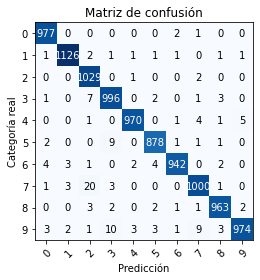

In [17]:
from matriz_confusion import graficar_matriz_de_confusion

y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)